In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.linear_model import Lasso, Ridge

In [106]:
df = pd.read_csv("train.csv")
lmbda = [0.0001]
for i in range(30):
    lmbda.append(lmbda[i]*math.sqrt(3))

In [90]:
def train_ridge(df):
    cols = np.array(df.columns, dtype="str")
    cols = cols[cols != "y"]
    X = df[cols]
    y = df["y"]
    global lmbda
    coefs = []
    const=[]
    for l in lmbda:
        md = Ridge(alpha= l)
        md.fit(X, y)
        coefs.append(md.coef_)
        const.append(md.intercept_)

    coefs = np.stack(coefs, axis=0)
    const = np.array(const).reshape((-1, 1))
    coefs = np.concatenate([coefs, const], axis=1)
    return coefs

def train_lasso(df):
    cols = np.array(df.columns, dtype="str")
    cols = cols[cols != "y"]
    X = df[cols]
    y = df["y"]
    global lmbda
    const=[]
    coefs = []
    for l in lmbda:
        md = Lasso(alpha= l)
        md.fit(X, y)
        coefs.append(md.coef_)
        const.append(md.intercept_)

    coefs = np.stack(coefs, axis=0)
    const = np.array(const).reshape((-1, 1))
    coefs = np.concatenate([coefs, const], axis=1)
    return coefs

In [91]:
def mse(coefs, X, y):
   X2 = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
   diff = ( y.reshape((1, -1)) - coefs @ X2.T )**2
   mse = np.mean(diff, axis=1)
   return mse.reshape((-1, 1))

def r2(coefs, X, y):
   X2 = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
   diff = ((y.reshape((1, -1)))-coefs@X2.T )**2
   ssq = np.sum(diff, axis=1).reshape((-1, 1))
   ym = np.mean(y)
   vary = np.sum((y-ym)**2)
   toret = (1-ssq/vary).reshape((-1, 1))
   return toret

In [92]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.043340,-0.055108,0.013952,-0.042614,-0.082311,0.001120,0.050352,0.012817,-0.081404
std,0.963503,1.028121,1.243022,1.320430,1.521868,1.050262,1.740945,3.749803,3.715830
min,-2.790741,-2.736344,-3.774469,-3.109950,-6.130380,-2.859273,-4.692917,-23.763651,-9.053706
25%,-0.621997,-0.858759,-0.855034,-0.902814,-0.907651,-0.693478,-1.003696,-0.689363,-2.629586
50%,0.039014,-0.048380,0.040592,-0.053091,-0.120248,0.051763,0.009262,0.030157,0.013964
75%,0.667138,0.677729,0.861559,0.864445,0.941497,0.689415,1.223192,0.715281,2.342404
max,3.194482,3.158581,3.089085,3.956116,6.104225,2.602919,3.725668,31.824430,10.505416


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>, <Axes: title={'center': 'x3'}>],
       [<Axes: title={'center': 'x4'}>, <Axes: title={'center': 'x5'}>, <Axes: title={'center': 'x6'}>],
       [<Axes: title={'center': 'x7'}>, <Axes: title={'center': 'x8'}>, <Axes: title={'center': 'y'}>]], dtype=object)

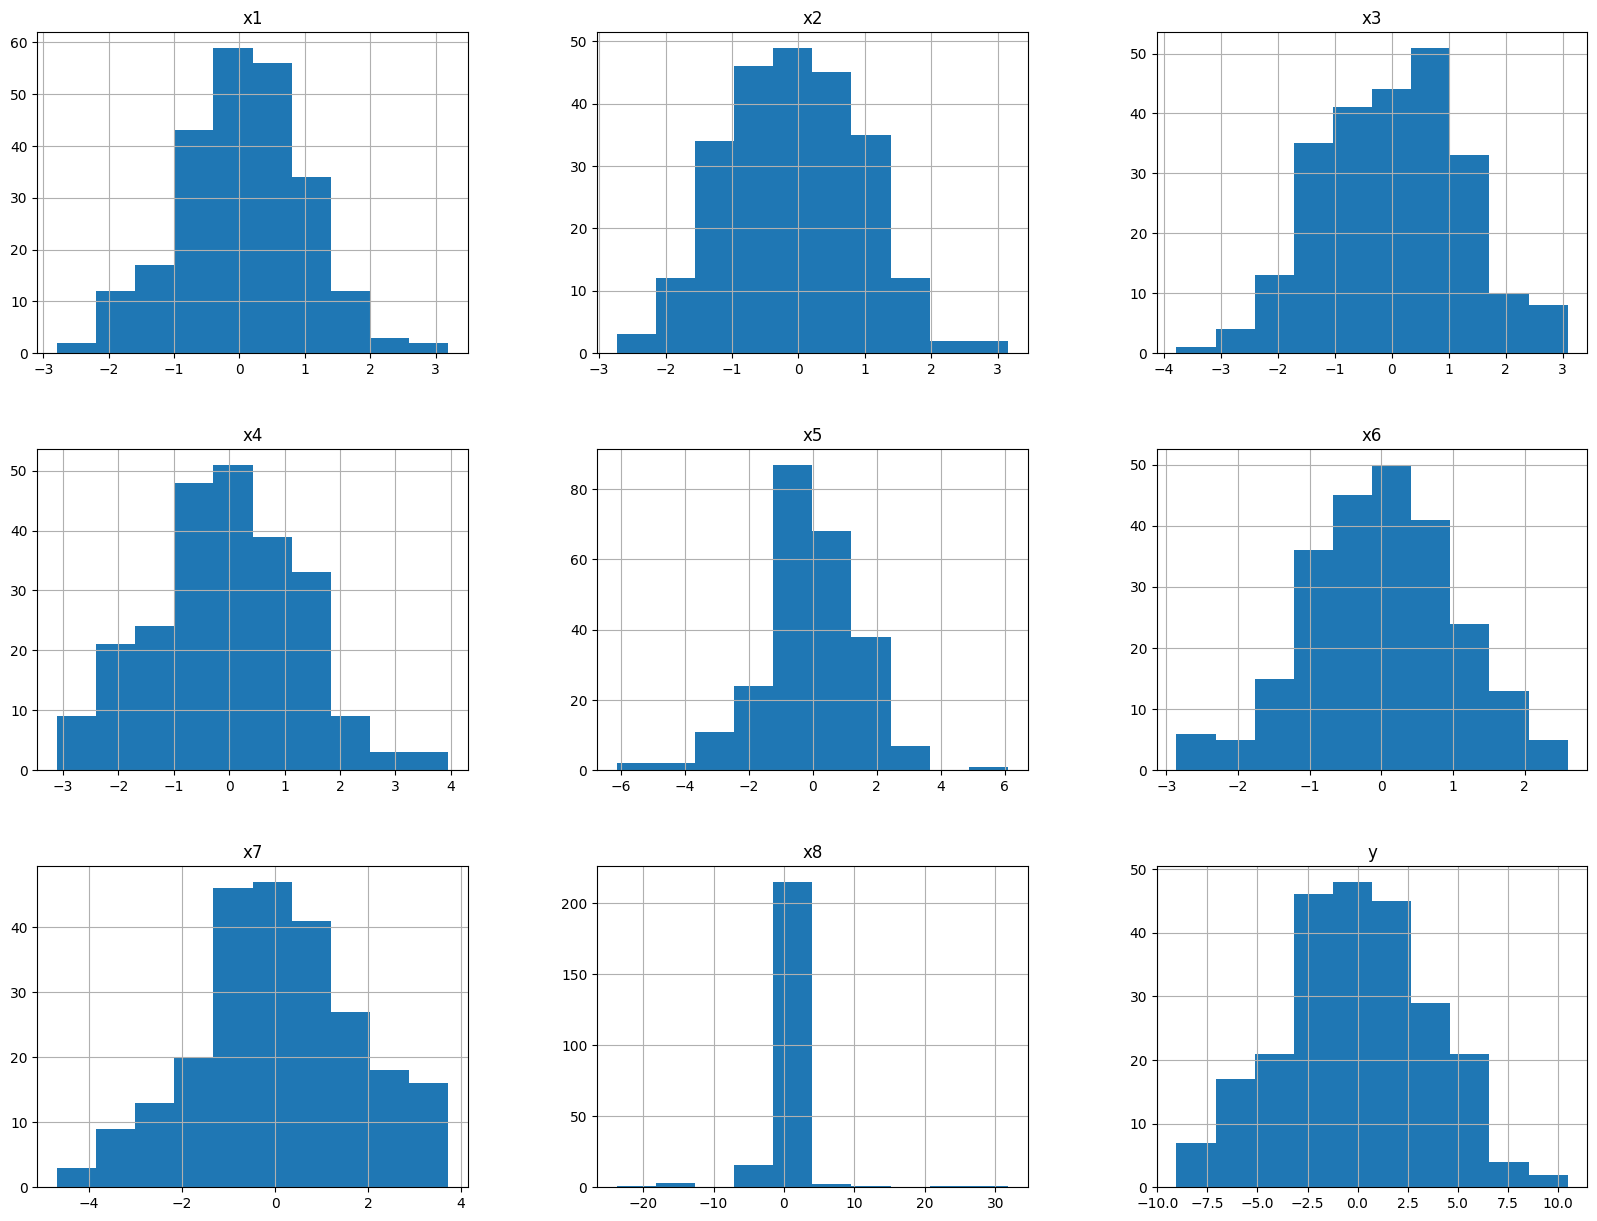

In [93]:
df.hist(figsize=(20, 15))

x8 seems to have extreme outliers

<Axes: >

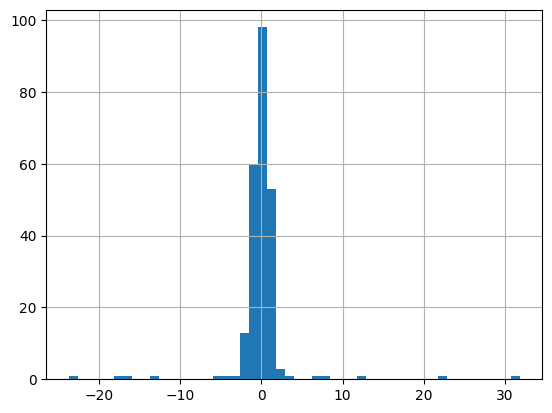

In [94]:
df['x8'].hist(bins=50)

In [95]:
filtered_df = df.copy()

In [11]:
from sklearn.preprocessing import RobustScaler, StandardScaler

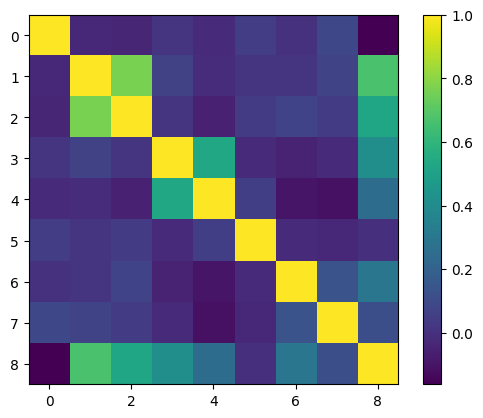

In [96]:
plt.imshow(filtered_df.corr())
plt.colorbar()

In [97]:
cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

In [14]:
from sklearn.linear_model import RidgeCV, LassoCV

In [98]:
# scaling
rs = RobustScaler()
filtered_df[cols] = rs.fit_transform(filtered_df[cols])

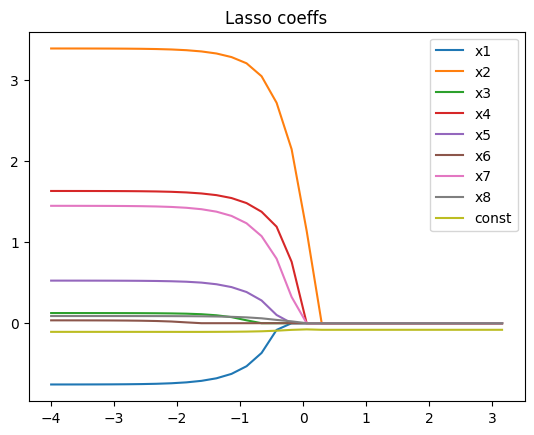

In [107]:
# Lasso coeffs and ridge coeffs

# lasso 
plt.figure()
plt.title("Lasso coeffs")
coefs = train_lasso(filtered_df)
plt.plot(np.log10(lmbda), coefs)
plt.legend(labels = cols + ['const'])

In [109]:
np.set_printoptions(precision=3, suppress=True, linewidth=120)
coefs

array([[-0.756,  3.389,  0.126,  1.631,  0.525,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.389,  0.126,  1.631,  0.525,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.389,  0.126,  1.631,  0.525,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.389,  0.126,  1.631,  0.525,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.389,  0.126,  1.631,  0.525,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.389,  0.126,  1.631,  0.525,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.389,  0.126,  1.631,  0.525,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.389,  0.126,  1.631,  0.525,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.389,  0.126,  1.631,  0.525,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.388,  0.126,  1.631,  0.525,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.387,  0.127,  1.631,  0.526,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.386,  0.128,  1.631,  0.526,  0.035,  1.448,  0.088, -0.107],
       [-0.756,  3.384,  0.1

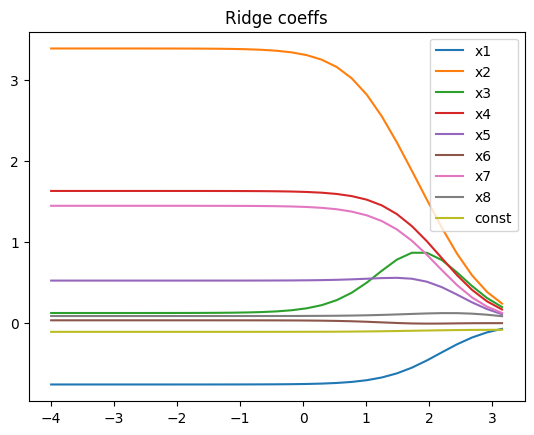

In [108]:
# Ridge
plt.figure()
plt.title("Ridge coeffs")
coefs = train_ridge(filtered_df)
plt.plot(np.log10(lmbda), coefs)
plt.legend(labels = cols + ['const'])

In [110]:
filtered_df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.000000,-0.028845,-0.036430,0.012948,-0.022908,0.049829,0.003397,0.089585,-0.161956
x2,-0.028845,1.000000,0.764555,0.068560,-0.012648,0.016480,0.015551,0.077029,0.664181
x3,-0.036430,0.764555,1.000000,0.015358,-0.053267,0.046710,0.069848,0.043858,0.519874
x4,0.012948,0.068560,0.015358,1.000000,0.529500,-0.020089,-0.052937,-0.024272,0.412108
x5,-0.022908,-0.012648,-0.053267,0.529500,1.000000,0.053827,-0.097923,-0.107640,0.248267
x6,0.049829,0.016480,0.046710,-0.020089,0.053827,1.000000,-0.025325,-0.028279,0.001025
x7,0.003397,0.015551,0.069848,-0.052937,-0.097923,-0.025325,1.000000,0.133525,0.294935
x8,0.089585,0.077029,0.043858,-0.024272,-0.107640,-0.028279,0.133525,1.000000,0.117875
y,-0.161956,0.664181,0.519874,0.412108,0.248267,0.001025,0.294935,0.117875,1.000000


# Task 2
1. Feature elimination

Text(0.5, 1.0, 'x6 vs y')

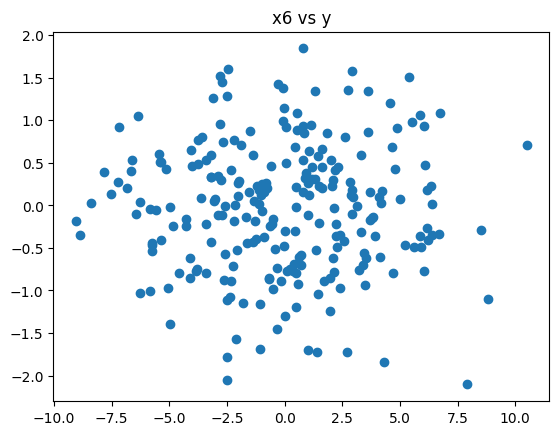

In [111]:
plt.scatter(filtered_df['y'], filtered_df['x6'])
plt.title('x6 vs y')

It seems that x6 is driven out fastest, but then it has small coefficient to begin with already. but corr of y and x6 is also pretty small. So x6 is a useless feature.

2. Correlated features

From the ridge path it seems that x3 is one of the features that is similar to other ones, because it is the only feature who's coefficient increases, perhaps to match some other feture in ridge regression. After the increase, its coefficient is pretty close to that of x8, x4, x2. But from correlation matrix, we can conclude it is just x2 that it is closely related to. 

OLS gives them separate coefficients because of overfitting. 

3. Reliability and availability

The features with high correlation are (x4, x5) and (x7, x8). Since sensor A and B are measuring the same phenomenon, it is likely that they have high correlation, so the above feature pairs are out candidates

Text(0.5, 1.0, 'x4 vs x5')

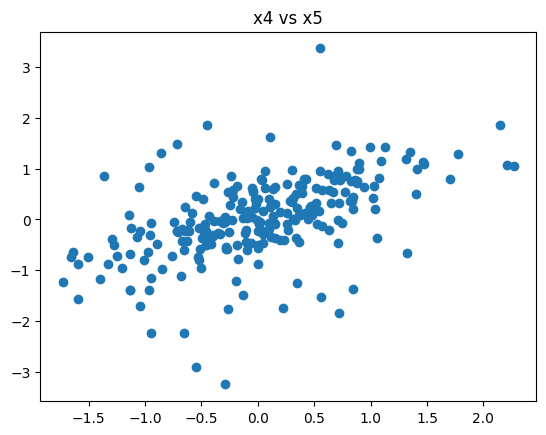

In [112]:
plt.scatter(filtered_df['x4'], filtered_df['x5'])
plt.title('x4 vs x5')

Text(0.5, 1.0, 'x7 vs x8')

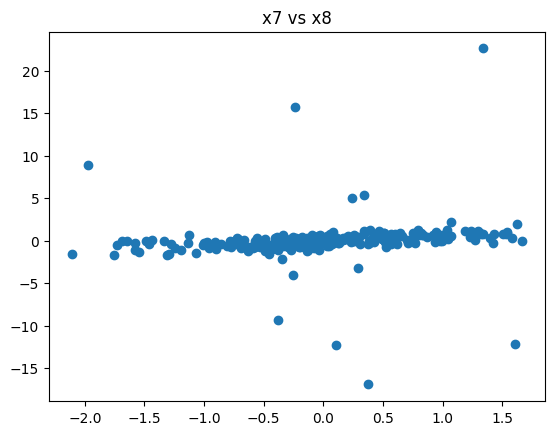

In [113]:
plt.scatter(filtered_df['x7'], filtered_df['x8'])
plt.title('x7 vs x8')

In [196]:
small_df = df[abs(df['x8'])<2]

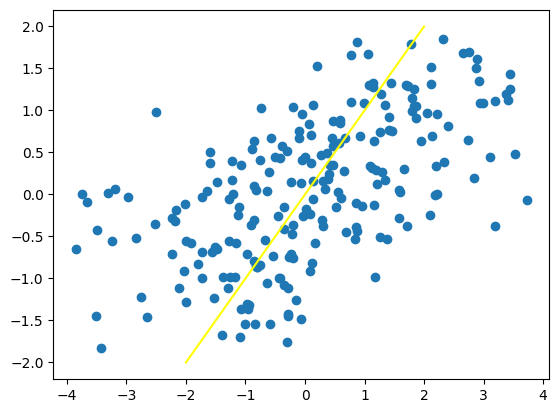

In [197]:
arr = np.linspace(-2, 2, 50)
plt.scatter(small_df['x7'], small_df['x8'])
plt.plot(arr, arr, color="yellow")

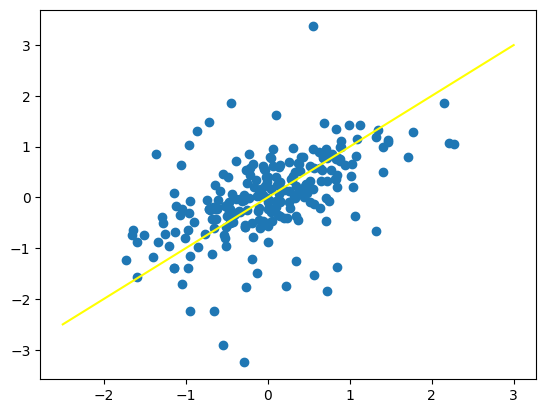

In [119]:
plt.scatter(filtered_df['x4'], filtered_df['x5'])
plt.plot(np.linspace(-2.5, 3, 50), np.linspace(-2.5, 3, 50), color="yellow")

both x7, x8 pair and x4,x5 are candidates, but it seems x7 , x8 dont have y=x as the best fit line so the scales are different so unlikely to be the same thing. x5 has very random values many times so it may correspond to the type of dropout we have, x4 has a lot of noise

x5 is sensor B, and x4 is sensor A

4. independent signal

In [198]:
cols2 = ['x1', 'x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'y']

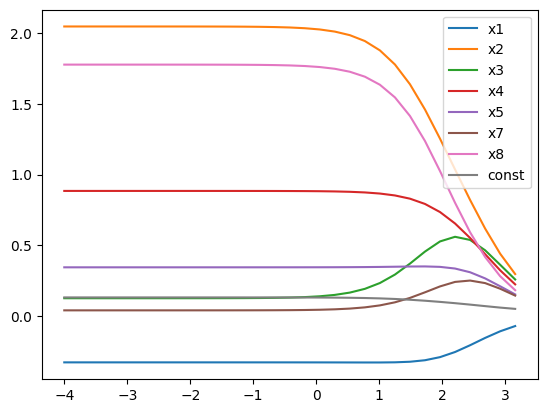

In [201]:
coefs = train_ridge(small_df[cols2])
plt.plot(np.log10(lmbda), coefs)
plt.legend(labels = cols2[:-1]+['const'])

In [202]:
coefs[10:30]

array([[-0.328,  2.047,  0.126,  0.884,  0.344,  0.04 ,  1.777,  0.131],
       [-0.328,  2.047,  0.126,  0.884,  0.344,  0.04 ,  1.777,  0.131],
       [-0.328,  2.046,  0.126,  0.884,  0.344,  0.04 ,  1.777,  0.131],
       [-0.328,  2.045,  0.127,  0.884,  0.344,  0.04 ,  1.776,  0.131],
       [-0.328,  2.043,  0.128,  0.884,  0.344,  0.041,  1.775,  0.131],
       [-0.328,  2.04 ,  0.13 ,  0.884,  0.344,  0.041,  1.772,  0.131],
       [-0.328,  2.035,  0.134,  0.883,  0.344,  0.042,  1.768,  0.131],
       [-0.328,  2.026,  0.139,  0.882,  0.345,  0.044,  1.761,  0.13 ],
       [-0.328,  2.011,  0.149,  0.881,  0.345,  0.047,  1.748,  0.13 ],
       [-0.329,  1.986,  0.165,  0.878,  0.345,  0.052,  1.727,  0.129],
       [-0.329,  1.945,  0.192,  0.874,  0.346,  0.061,  1.692,  0.127],
       [-0.329,  1.878,  0.233,  0.866,  0.347,  0.075,  1.635,  0.124],
       [-0.328,  1.779,  0.293,  0.852,  0.348,  0.097,  1.546,  0.12 ],
       [-0.324,  1.639,  0.37 ,  0.83 ,  0.35 ,  0.

All features (except x6) retain sizable coefficients for quite long. x4, x5, x1 are the remaining features. x4 and x5 are quite correlated but, the independent one seems x1. In regularization, independent features must be retained for long enough because there is no similar feature to distribute coefficient with. 

5. Structural corruption vs noise

Text(0.5, 1.0, 'x8 vs y')

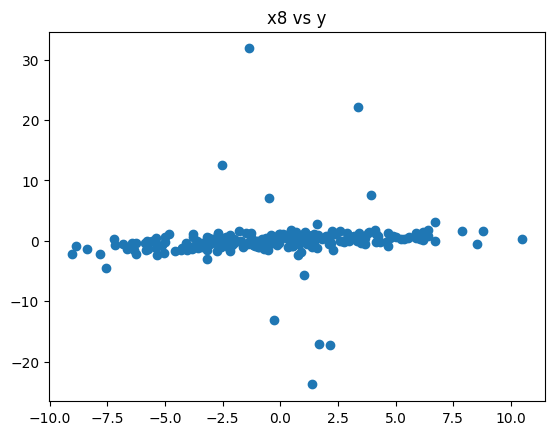

In [204]:
plt.scatter(df['y'], df['x8'])
plt.title('x8 vs y')

Text(0.5, 1.0, 'x7 vs y')

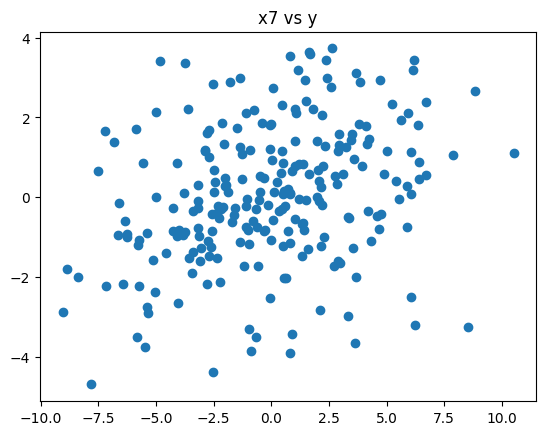

In [205]:
plt.scatter(df['y'], df['x7'])
plt.title('x7 vs y')

x7 seems to trace a line with positive slope but high noise. whereas x8 seems to have extreme outliers

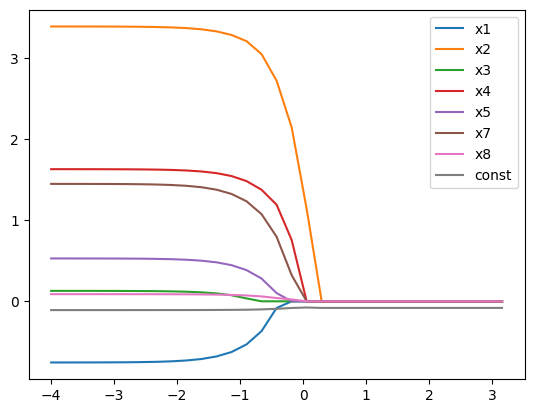

In [206]:
coefs = train_lasso(filtered_df[cols2])
plt.plot(np.log10(lmbda), coefs)
plt.legend(cols2[:-1]+['const'])

In [207]:
coefs[:20]

array([[-0.754,  3.388,  0.129,  1.629,  0.528,  1.447,  0.088, -0.108],
       [-0.754,  3.388,  0.128,  1.629,  0.528,  1.447,  0.088, -0.108],
       [-0.754,  3.387,  0.128,  1.629,  0.528,  1.447,  0.088, -0.108],
       [-0.753,  3.387,  0.128,  1.628,  0.528,  1.447,  0.088, -0.108],
       [-0.753,  3.387,  0.128,  1.628,  0.527,  1.446,  0.088, -0.108],
       [-0.751,  3.386,  0.127,  1.627,  0.527,  1.445,  0.088, -0.108],
       [-0.749,  3.384,  0.127,  1.626,  0.525,  1.443,  0.088, -0.108],
       [-0.746,  3.381,  0.125,  1.624,  0.523,  1.44 ,  0.087, -0.108],
       [-0.74 ,  3.376,  0.123,  1.62 ,  0.519,  1.434,  0.087, -0.108],
       [-0.729,  3.368,  0.118,  1.613,  0.512,  1.424,  0.086, -0.108],
       [-0.711,  3.353,  0.111,  1.601,  0.501,  1.406,  0.085, -0.107],
       [-0.68 ,  3.328,  0.098,  1.58 ,  0.481,  1.376,  0.083, -0.107],
       [-0.625,  3.283,  0.075,  1.544,  0.445,  1.324,  0.079, -0.106],
       [-0.531,  3.207,  0.036,  1.482,  0.385,  1.

The coefficient of x8 seems pretty small throughout, because y is a normal value, while x8 is extremely large sometimes. Lasso is also throwing it away quickly. 

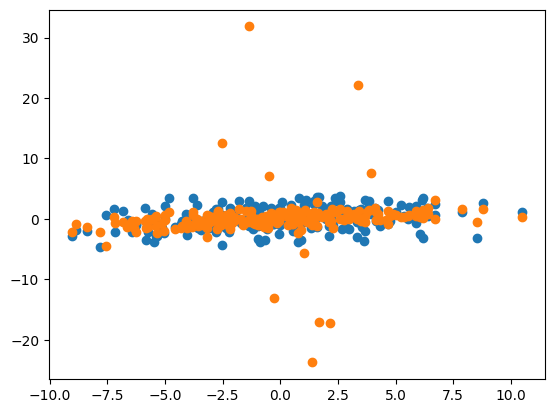

In [127]:
plt.scatter(df['y'], df['x7'])
plt.scatter(df['y'], df['x8'])

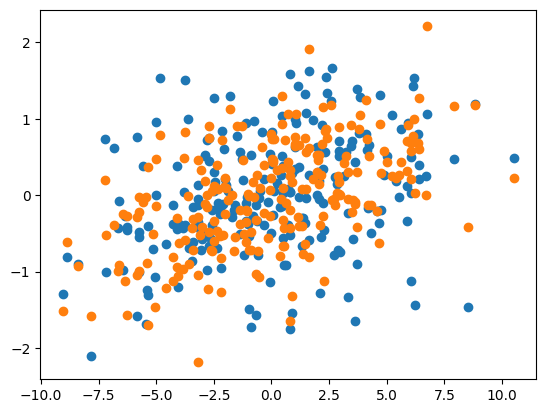

In [209]:
small_df = filtered_df[abs(df['x8'])<4]
plt.scatter(small_df['y'], small_df['x7'])
plt.scatter(small_df['y'], small_df['x8'])

x7 and x8 resemble when outliers in x8 are removed

# model training

In [233]:
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.000000,-0.028845,-0.036430,0.012948,-0.022908,0.049829,0.003397,0.089585,-0.161956
x2,-0.028845,1.000000,0.764555,0.068560,-0.012648,0.016480,0.015551,0.077029,0.664181
x3,-0.036430,0.764555,1.000000,0.015358,-0.053267,0.046710,0.069848,0.043858,0.519874
x4,0.012948,0.068560,0.015358,1.000000,0.529500,-0.020089,-0.052937,-0.024272,0.412108
x5,-0.022908,-0.012648,-0.053267,0.529500,1.000000,0.053827,-0.097923,-0.107640,0.248267
x6,0.049829,0.016480,0.046710,-0.020089,0.053827,1.000000,-0.025325,-0.028279,0.001025
x7,0.003397,0.015551,0.069848,-0.052937,-0.097923,-0.025325,1.000000,0.133525,0.294935
x8,0.089585,0.077029,0.043858,-0.024272,-0.107640,-0.028279,0.133525,1.000000,0.117875
y,-0.161956,0.664181,0.519874,0.412108,0.248267,0.001025,0.294935,0.117875,1.000000


In [234]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.043340,-0.055108,0.013952,-0.042614,-0.082311,0.001120,0.050352,0.012817,-0.081404
std,0.963503,1.028121,1.243022,1.320430,1.521868,1.050262,1.740945,3.749803,3.715830
min,-2.790741,-2.736344,-3.774469,-3.109950,-6.130380,-2.859273,-4.692917,-23.763651,-9.053706
25%,-0.621997,-0.858759,-0.855034,-0.902814,-0.907651,-0.693478,-1.003696,-0.689363,-2.629586
50%,0.039014,-0.048380,0.040592,-0.053091,-0.120248,0.051763,0.009262,0.030157,0.013964
75%,0.667138,0.677729,0.861559,0.864445,0.941497,0.689415,1.223192,0.715281,2.342404
max,3.194482,3.158581,3.089085,3.956116,6.104225,2.602919,3.725668,31.824430,10.505416


In [235]:
new_df = df.copy()
new_df['x5'] = np.where(abs(df['x5']-df['x4'])>1, df['x4'], df['x5'])

In [236]:
new_df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.000000,-0.028845,-0.036430,0.012948,0.019654,0.049829,0.003397,0.089585,-0.161956
x2,-0.028845,1.000000,0.764555,0.068560,0.076607,0.016480,0.015551,0.077029,0.664181
x3,-0.036430,0.764555,1.000000,0.015358,-0.002996,0.046710,0.069848,0.043858,0.519874
x4,0.012948,0.068560,0.015358,1.000000,0.943797,-0.020089,-0.052937,-0.024272,0.412108
x5,0.019654,0.076607,-0.002996,0.943797,1.000000,-0.014238,-0.081318,-0.049652,0.414194
x6,0.049829,0.016480,0.046710,-0.020089,-0.014238,1.000000,-0.025325,-0.028279,0.001025
x7,0.003397,0.015551,0.069848,-0.052937,-0.081318,-0.025325,1.000000,0.133525,0.294935
x8,0.089585,0.077029,0.043858,-0.024272,-0.049652,-0.028279,0.133525,1.000000,0.117875
y,-0.161956,0.664181,0.519874,0.412108,0.414194,0.001025,0.294935,0.117875,1.000000


I will drop x6, repair x8 with median when needed, fit ridge for grouping of x2, x3, and x7, x8 and i will drop x4 as well because it is taken care of by repaired x5

In [237]:
cols = ['x1', 'x2', 'x3', 'x5', 'x7', 'x8']
df_to_fit = new_df[cols]

# repair x8 column
fill_val = new_df[abs(new_df['x8'])<4]['x8'].median()
df_to_fit.loc[:, 'x8'] = np.where(abs(df_to_fit['x8']) > 4, fill_val, df_to_fit['x8'])

In [238]:
# ridgecv

# standardizing
rs = RobustScaler()
df_to_fit.loc[:, cols] = rs.fit_transform(df_to_fit)

# fitting ridgev
y = new_df['y']
rc = RidgeCV(alphas=lmbda)
rc.fit(df_to_fit, y)

,alphas,"[0.0001, 0.00017320508075688773, ...]"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [239]:
# reading and standardizing test df

test_df = pd.read_csv("test_X.csv")

<Axes: >

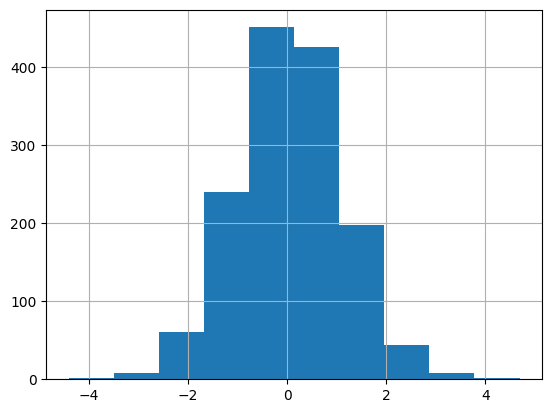

In [240]:
small_df = test_df[abs(test_df['x8'])<5]
small_df['x8'].hist()

In [241]:
# repairing values of x8
fill_val = small_df['x8'].median()
test_df.loc[:, 'x8'] = np.where(abs(test_df['x8'])>=5, fill_val, test_df['x8'])


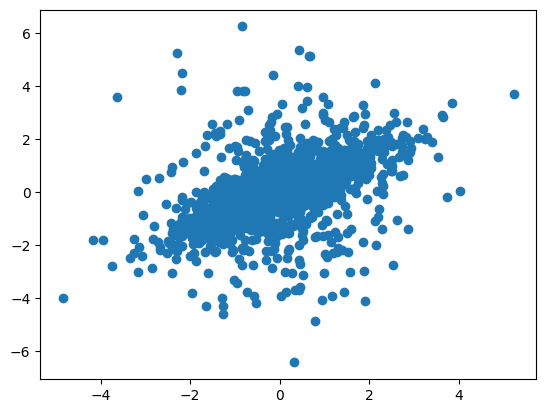

In [243]:
plt.scatter(test_df['x4'], test_df['x5'])

In [246]:
# repairing x5
test_df.loc[:, 'x5'] = np.where(abs(test_df['x4']-test_df['x5'])>1, test_df['x4'], test_df['x5'])

In [248]:
stand_test = rs.transform(test_df[cols])

In [249]:
y_preds = rc.predict(test_df[cols])

In [252]:
df_preds =pd.DataFrame({'y' : y_preds})
df_preds.to_csv("24B0919_24B0979.csv", index=False)